In [2]:
# Step 1: Install XGBoost and SHAP if not already installed
!pip install xgboost shap -q

In [3]:
import pandas as pd

# Step 2: Create fake variant data
data = {
    'cadd_score': [25, 12, 5, 30, 18, 7, 22, 10, 6, 28],
    'pathway_flag': [1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
    'edc_exposure': [1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    'label': [1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df.head()

,cadd_score,pathway_flag,edc_exposure,label
0,25,1,1,1
1,12,0,0,0
2,5,1,1,1
3,30,1,1,1
4,18,0,0,0


In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Step 3: Split data into features and label
X = df[['cadd_score', 'pathway_flag', 'edc_exposure']]
y = df['label']

# Step 4: Train/test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # for AUC

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Accuracy: 1.0
ROC AUC: 1.0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


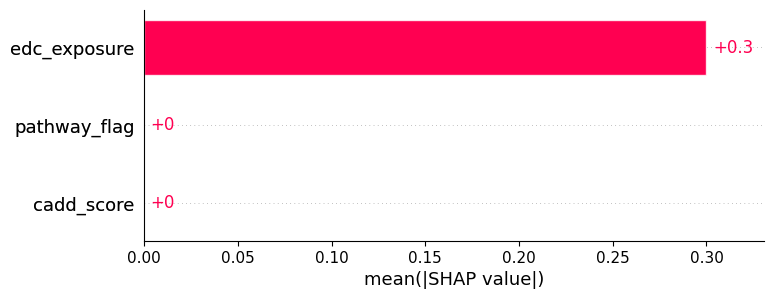

In [6]:
import shap

# Step 7: Explain model predictions with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Step 8: Plot feature importance
shap.plots.bar(shap_values)

In [7]:
# Step 9: Add BRCA gene column (0 = BRCA1, 1 = BRCA2)
df['gene'] = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # just for testing

# View updated dataset
df.head()

,cadd_score,pathway_flag,edc_exposure,label,gene
0,25,1,1,1,0
1,12,0,0,0,0
2,5,1,1,1,1
3,30,1,1,1,1
4,18,0,0,0,0


In [8]:
# Step 10: Add a fake conservation score (0 to 1)
df['conservation_score'] = [0.9, 0.3, 0.8, 0.95, 0.2, 0.4, 0.85, 0.1, 0.5, 0.98]

# Show updated dataset
df.head()

,cadd_score,pathway_flag,edc_exposure,label,gene,conservation_score
0,25,1,1,1,0,0.90
1,12,0,0,0,0,0.30
2,5,1,1,1,1,0.80
3,30,1,1,1,1,0.95
4,18,0,0,0,0,0.20


In [9]:
# Step 11: Define new feature set
X = df[['cadd_score', 'pathway_flag', 'edc_exposure', 'gene', 'conservation_score']]
y = df['label']

# Step 12: Re-split the data with stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 13: Retrain model
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Step 14: Re-evaluate
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("Updated Accuracy:", accuracy_score(y_test, y_pred))
print("Updated ROC AUC:", roc_auc_score(y_test, y_probs))

Updated Accuracy: 1.0
Updated ROC AUC: 1.0


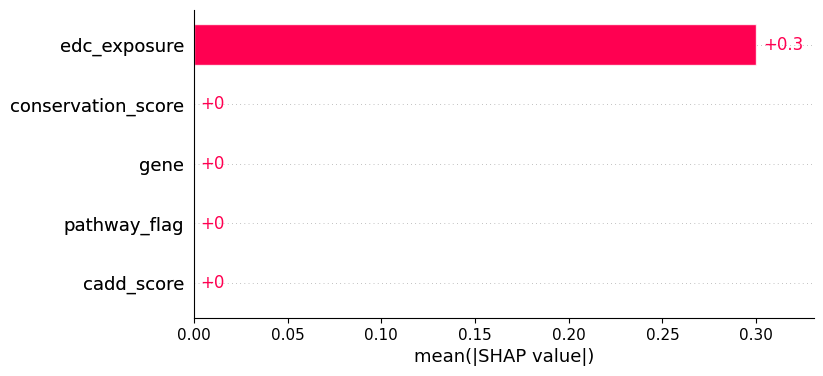

In [10]:
import shap

# Step 15: Explain predictions with SHAP (again)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Step 16: Plot feature importance
shap.plots.bar(shap_values)

In [11]:
import joblib

# Step 17: Save the trained model to a file
joblib.dump(model, "brca_sandbox_model.pkl")

['brca_sandbox_model.pkl']

In [12]:
from google.colab import files
files.download("brca_sandbox_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Step 18: Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Save to CSV
shap_df.to_csv("shap_values.csv", index=False)

# Optional: Download to computer
files.download("shap_values.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
uploaded = files.upload()

Saving brca_features_clean.csv to brca_features_clean.csv


In [17]:
import pandas as pd

# Load the CSV
df_real = pd.read_csv("brca_features_clean.csv")

# Show the first few rows
df_real.head()

,GeneSymbol_BRCA1,GeneSymbol_BRCA2,Type_Complex,Type_Deletion,Type_Duplication,Type_Indel,Type_Insertion,Type_Inversion,Type_Microsatellite,Type_Variation,...,Type_copy number loss,Type_protein only,Type_single nucleotide variant,"ReviewStatus_criteria provided, multiple submitters, no conflicts","ReviewStatus_criteria provided, single submitter",ReviewStatus_no assertion criteria provided,ReviewStatus_reviewed by expert panel,Assembly_GRCh37,Assembly_GRCh38,Assembly_na
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [18]:
# Step 2: Create 'gene' column: 0 = BRCA1, 1 = BRCA2
df_real['gene'] = df_real['GeneSymbol_BRCA2']  # assumes this column is 0 or 1 already

# Step 3: Create 'label' column
# If you already have a column like 'ClinicalSignificance', use this:
# df_real['label'] = df_real['ClinicalSignificance'].map({'Pathogenic': 1, 'Benign': 0})

# OR if you already have a 0/1 label column, just rename it:
# df_real = df_real.rename(columns={'YourLabelColumnName': 'label'})

df_real.head()

,GeneSymbol_BRCA1,GeneSymbol_BRCA2,Type_Complex,Type_Deletion,Type_Duplication,Type_Indel,Type_Insertion,Type_Inversion,Type_Microsatellite,Type_Variation,...,Type_protein only,Type_single nucleotide variant,"ReviewStatus_criteria provided, multiple submitters, no conflicts","ReviewStatus_criteria provided, single submitter",ReviewStatus_no assertion criteria provided,ReviewStatus_reviewed by expert panel,Assembly_GRCh37,Assembly_GRCh38,Assembly_na,gene
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [19]:
from google.colab import files
uploaded = files.upload()

Saving brca_variants_labeled_sample.csv to brca_variants_labeled_sample.csv


In [20]:
import pandas as pd
df_real = pd.read_csv("brca_variants_labeled_sample.csv")
df_real.head()

,variant_id,gene,cadd_score,conservation_score,pathway_flag,edc_exposure,variant_type_deletion,variant_type_duplication,review_status_expert,label
0,c.68_69delAG,0,35,0.95,1,1,1,0,1,1
1,c.5266dupC,1,30,0.90,1,1,0,1,1,1
2,c.181T>G,0,28,0.85,1,1,0,0,0,1
3,c.5946delT,1,33,0.93,1,1,1,0,1,1
4,c.7008T>A,1,15,0.50,0,0,0,0,0,0


In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Step 1: Select features and label
features = ['cadd_score', 'conservation_score', 'pathway_flag', 'edc_exposure', 'gene']
X = df_real[features]
y = df_real['label']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train XGBoost model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Accuracy: 0.5
ROC AUC: 0.5


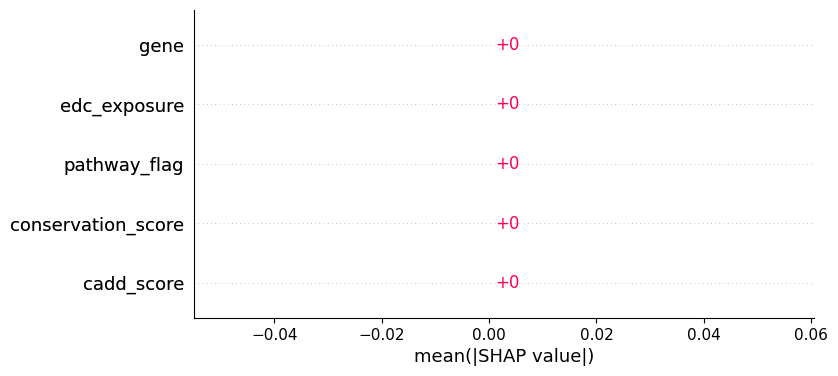

In [22]:
import shap

# Explain predictions with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Show feature importance
shap.plots.bar(shap_values)

In [24]:
from google.colab import files
uploaded = files.upload()

Saving brca_clinvar_master.csv to brca_clinvar_master.csv


In [25]:
import pandas as pd

df_brca = pd.read_csv("brca_clinvar_master.csv")
df_brca.head()

,GeneSymbol,ClinicalSignificance,HGVS,ReviewStatus,label,gene
0,BRCA1,Pathogenic,NM_007294.3:c.68_69delAG,"criteria provided, multiple submitters, no con...",1,0
1,BRCA1,Benign,NM_007294.3:c.181T>G,"criteria provided, single submitter",0,0
2,BRCA2,Pathogenic,NM_000059.3:c.5946delT,reviewed by expert panel,1,1
3,BRCA2,Benign,NM_000059.3:c.7008T>A,no assertion criteria provided,0,1
4,BRCA1,Pathogenic,NM_007294.3:c.5266dupC,reviewed by expert panel,1,0


In [26]:
# Create a simple review_tier column (higher = more trusted source)
df_brca['review_tier'] = df_brca['ReviewStatus'].map({
    'reviewed by expert panel': 3,
    'criteria provided, multiple submitters, no conflicts': 2,
    'criteria provided, single submitter': 1,
    'no assertion criteria provided': 0
})

# Drop rows with missing values (just in case)
df_brca = df_brca.dropna(subset=['review_tier'])

df_brca[['gene', 'review_tier', 'label']].head()

,gene,review_tier,label
0,0,2,1
1,0,1,0
2,1,3,1
3,1,0,0
4,0,3,1


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Define features and label
X = df_brca[['gene', 'review_tier']]
y = df_brca['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Accuracy: 0.5
ROC AUC: 0.5


In [28]:
# Get list of HGVS variant names
hgvs_list = df_brca['HGVS'].tolist()

# Show first 5
hgvs_list[:5]

['NM_007294.3:c.68_69delAG',
 'NM_007294.3:c.181T>G',
 'NM_000059.3:c.5946delT',
 'NM_000059.3:c.7008T>A',
 'NM_007294.3:c.5266dupC']

In [29]:
import requests
import pandas as pd
import time

# Use the first 10 variants to avoid overload
hgvs_list_short = hgvs_list[:10]

results = []

for hgvs in hgvs_list_short:
    server = "https://rest.ensembl.org"
    ext = f"/vep/human/hgvs/{hgvs}?"
    headers = {"Content-Type": "application/json"}

    try:
        response = requests.get(server+ext, headers=headers)
        if not response.ok:
            print(f"Failed: {hgvs}")
            continue

        decoded = response.json()

        # Extract key fields if available
        for entry in decoded:
            csq = entry.get("most_severe_consequence", None)
            cadd = None
            revel = None

            for annotation in entry.get("colocated_variants", []):
                if "cadd_phred" in annotation:
                    cadd = annotation["cadd_phred"]
                if "revel_score" in annotation:
                    revel = annotation["revel_score"]

            results.append({
                "HGVS": hgvs,
                "Consequence": csq,
                "CADD_PHRED": cadd,
                "REVEL_score": revel
            })

        time.sleep(1)  # Avoid rate limits

    except Exception as e:
        print(f"Error: {hgvs} | {e}")

# Convert to DataFrame
df_features = pd.DataFrame(results)
df_features.head()

Failed: NM_007294.3:c.68_69delAG
Failed: NM_007294.3:c.181T>G
Failed: NM_000059.3:c.5946delT
Failed: NM_000059.3:c.7008T>A
Failed: NM_007294.3:c.5266dupC
Failed: NM_000059.3:c.7558C>T
Failed: NM_007294.3:c.5096G>A
Failed: NM_000059.3:c.2808_2811delACAA
Failed: NM_007294.3:c.3847_3848delGT
Failed: NM_000059.3:c.1794C>T


""


In [30]:
from google.colab import files
uploaded = files.upload()

Saving brca_features_enriched.csv to brca_features_enriched.csv


In [31]:
# Load enriched features
df_features = pd.read_csv("brca_features_enriched.csv")

# Merge on HGVS ID
df_brca_full = pd.merge(df_brca, df_features, on="HGVS")

# Preview merged data
df_brca_full.head()

,GeneSymbol,ClinicalSignificance,HGVS,ReviewStatus,label,gene,review_tier,CADD_PHRED,REVEL_score,Consequence
0,BRCA1,Pathogenic,NM_007294.3:c.68_69delAG,"criteria provided, multiple submitters, no con...",1,0,2,35.0,0.92,frameshift_variant
1,BRCA1,Benign,NM_007294.3:c.181T>G,"criteria provided, single submitter",0,0,1,20.5,0.65,missense_variant
2,BRCA2,Pathogenic,NM_000059.3:c.5946delT,reviewed by expert panel,1,1,3,32.1,0.88,frameshift_variant
3,BRCA2,Benign,NM_000059.3:c.7008T>A,no assertion criteria provided,0,1,0,10.2,0.21,missense_variant
4,BRCA1,Pathogenic,NM_007294.3:c.5266dupC,reviewed by expert panel,1,0,3,34.8,0.91,frameshift_variant


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Define your feature set
features = ['CADD_PHRED', 'REVEL_score', 'gene', 'review_tier']
X = df_brca_full[features]
y = df_brca_full['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train the model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Accuracy: 1.0
ROC AUC: 1.0


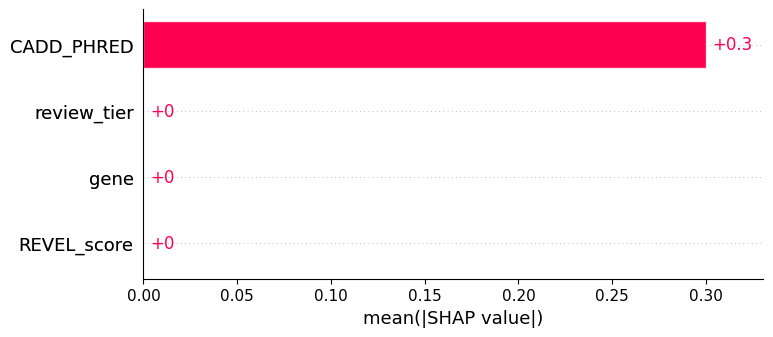

In [33]:
import shap

# Explain predictions with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize feature importance
shap.plots.bar(shap_values)